# Рекомендация тарифов

# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».В распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). 

# Цель

Построить модель для задачи классификации, которая выберет подходящий тариф. 

# Задачи 

1. Построить модель с максимально большим значением *accuracy*. 
2. Довести долю правильных ответов по крайней мере до 0.75. 
3. Проверить *accuracy* на тестовой выборке самостоятельно.

## Ознакомление с файлом

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


## Разбиение данных на выборки

В задаче целевым признаком, который нужно предсказать является столбец 'is_ultra'. В наборе данных о клиентах, значений в этом столбце всего два, каким тарифом пользовался в течение месяца, - «Ультра» — 1, «Смарт» — 0, поэтому предстоит решить задачу классификации. Сохраним обучающие признаки в переменной features, целевой признак в переменной target и объявим их:

In [4]:
features = df.drop(['is_ultra'], axis=1)

In [5]:
target = df['is_ultra']

Разделим весь набор данных один раз для выделения обучающей выборки - 70% для обучения и временно назначаем остаток для тестирования. Затем еще раз, чтобы разбить оставшиеся данные поровну на датасеты для тестирования и валидации. Для пропорциональности классов при разделении на обучающий и проверяющий датасеты будем использовать параметр stratify функции train_test_split. 

In [6]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size=0.7, random_state=12345, stratify=target)

In [7]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size=0.5, random_state=12345, stratify=target_test)

In [8]:
display(
    features_train.shape, 
    target_train.shape, 
    features_test.shape, 
    target_test.shape,
    features_valid.shape, 
    target_valid.shape)

(2249, 4)

(2249,)

(482, 4)

(482,)

(483, 4)

(483,)

## Исследоваие модели

Для задач классификации рассмотрим 3 модели и выберем модель с максимально большим значением accuracy:

### Дерево решений:


In [9]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_train, target_train);
train_predictions = model.predict(features_train)
valid_predictions = model.predict(features_valid)
accuracy = accuracy_score(target_train, train_predictions) 
accuracy_valid = accuracy_score(target_valid, valid_predictions) 
print("Accuracy")
print("Обучающая выборка:", accuracy) 
print("Валидационная выборка:", accuracy_valid)  

Accuracy
Обучающая выборка: 1.0
Валидационная выборка: 0.7391304347826086


На обучающей выборке качество модели лучше, мы столкнулись с проблемой переобучения. Чтобы найти баланс между переобучением и недообучением поэкспериментируем с глубиной дерева. Выберем диапазон для глубины от 1 до 10 и проверим при какой глубине дерева точность наибольшая, выведем эти значения.

In [10]:
best_model = None
best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        max_depth = depth
        
print("Accuracy лучшей модели:", best_result, 'при глубине дерева:', max_depth)

Accuracy лучшей модели: 0.7991718426501035 при глубине дерева: 7


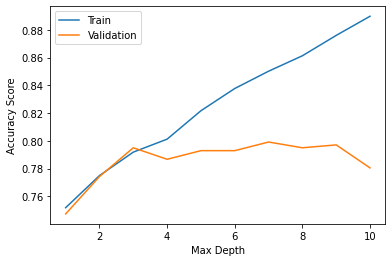

In [11]:
train_scores = []
valid_scores = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    train_predictions = model.predict(features_train)
    train_scores.append(accuracy_score(target_train, train_predictions))
    valid_predictions = model.predict(features_valid)
    valid_scores.append(accuracy_score(target_valid, valid_predictions))

plt.plot(range(1,11), train_scores, label='Train')
plt.plot(range(1,11), valid_scores, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

### Случайный лес

In [12]:
best_model_rf = None
best_result = 0
for est in range(1, 50): # число деревьев равное состоянию счётчика циклов — est;
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth) # обучим модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model_rf = model # сохранм наилучшую модель
        best_result = result #  сохраним наилучшее значение метрики accuracy на валидационных данных
        n_estimators=est
        max_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'при количестве деревьев:', n_estimators, 
      'при глубине:', max_depth)


Accuracy наилучшей модели на валидационной выборке: 0.8136645962732919 при количестве деревьев: 37 при глубине: 10


### Логистическая регрессия

In [13]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 
print('Accuracy логистической регрессии:', model.score(features_valid, target_valid))

Accuracy логистической регрессии: 0.7204968944099379


### Вывод

Наилучшее качество модели показал случайный лес с accuracy на валидационной выборке: 0.8136645962732919 при количестве деревьев: 37 при глубине: 10

## Проверка модели на тестовой выборке

In [14]:
predictions_test = best_model_rf.predict(features_test) 
print('Качество наилучшей модели на тестовой выборке:', best_model_rf.score(features_test, target_test), 
      'при количестве деревьев:', n_estimators, 
      'при глубине:', max_depth)

Качество наилучшей модели на тестовой выборке: 0.8091286307053942 при количестве деревьев: 37 при глубине: 10


## Проверка модели на адекватность

Проведем проверку с помощью DummyClassifier(), данная модель будет всегда выдавать самое часто встречающееся значение в целевом признаке вне зависимости от того какие данные ей подаются на вход.  
Сравним нашу лучшую модель с данной константной моделью.

In [16]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_test, target_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(features_test)
dummy_clf.score(features_test, target_test)

0.6929460580912863

### Вывод

Вывод: Модель показывает лучшие результаты, чем константная, таким образом выбранная нами модель работает лучше, чем случайные предсказания. 

## Выводы по проекту

В ходе исследования были открыты и изучены исходные данные. Для достижения цели исследования данные были разделены на 3 выборки - обучающую, валидационную и тестовую.
Проведено исследование нескольких моделей для задачи классификации - дерево решений, случайный лес и логистическая регрессия. Выявлены гиперпараметры, при которых модель имеет наибольшее качество на валидационной выборке:

    accuracy дерева решений = 0.7991718426501035 при глубине дерева: 7;
    accuracy случайного леса = 0.8136645962732919 при количестве деревьев: 37 при глубине: 10;
    accuracy логистической регрессии = 0.7204968944099379 при количестве итераций 1000;
    
Таким образом, наилучшей моделью, предсказывающей нужный тариф, является **случайный лес**. 

Модель была проверена на тестовой выборке, где показала близкий результат = 0.8091286307053942, а также проверена на вменяемость с результатом точности предсказания =  0.6929460580912863. Результат говорит о том, что модель работает адекватно и способна предсказать лучше, чем случайная.